# BL40A2010 Introduction to IoT-Based Systems

## Assignment 4, 04.02.2023

### Author: Liyuan Liu

**(1) Draw a graph with star topology with five nodes (one in the center $A$, four in the edges $B$-$E$).
If the topology is directed as a many-to-one topology, write the structure of awareness of the system, considering that nodes $B$-$E$ acquire and process data about a supporting reality $T$, while $A$ can only receive data from it. Remember the notation $Xy$ means the image of $X$ by $Y$.**

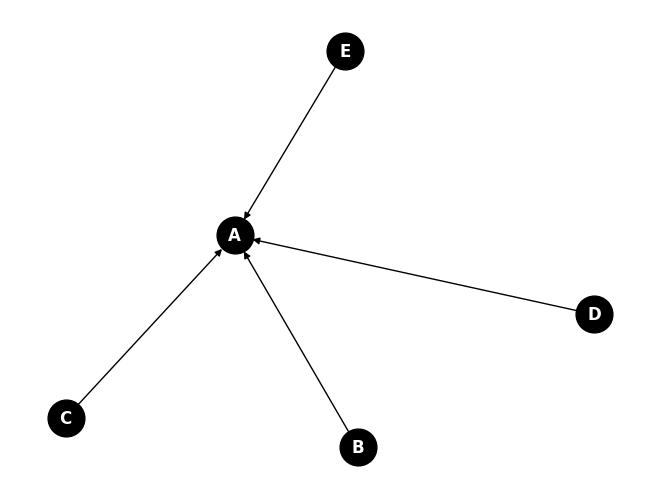

In [2]:
#Import libraries -->> If an error happens (no library), you need to install the missing libraries (see above)
import networkx as nx #https://networkx.github.io/
import matplotlib.pyplot as plt #https://matplotlib.org/
import scipy as sp
import numpy as np

G = nx.DiGraph()
G.add_node('A')
G.add_nodes_from(['B', 'C', 'D', 'E'])
G.add_edges_from([('B', 'A'), ('C', 'A'), ('D', 'A'), ('E', 'A')])

nx.draw(G, node_color='black', font_color='white', edge_color='black', font_weight='bold',  node_size=700,with_labels=True)
plt.show()

In [4]:
#Answer:
#Since the topology is directed as a many-to-one topology, node A can only receive data from T and does not have its own image of T
#Nodes B-E acquire and process data about a physical process T, 
#and create their own reflections of T, denoted as Tb, Tc, Td, and Te, respectively.
#W = T + Tb + Tc + Td + Te
#  = T(1 + b + c + d + e)
#  = Tw
# where w=1+b+c+d+e is the structure of awareness.

**(2) Assume that graph illustrate a scenario of four sensor nodes that also (pre-)process data and one aggregator node as follows. Nodes $B$ and $C$ monitor temperature and wind speed at Airport station in Lappeenranta, respectively. Nodes $D$ and $E$ monitor temperature and wind speed at Lepola station in Lappeenranta, respectively. Nodes $B$ and $D$ send a binary message to $A$ indicating if during that period the temperature was more than $25$ degrees ("1" means above, "0" means below or equal to). Likewise nodes $C$ and $E$ send a binary message to $A$ indicating if during that period the wind speed was more than $5$ m/s ("1" means above, "0" means below or equal to). Download and plot the data from [FMI](http://en.ilmatieteenlaitos.fi/download-observations\#!/) with 1 hour resolution during July, 2018. Using this data, plot the binary signals sent from the nodes $B$-$E$ to the aggregator $A$.**

In [22]:
#Import libraries
import pandas as pd #https://pandas.pydata.org/
import matplotlib.pyplot as plt #https://matplotlib.org/
import matplotlib.dates as mdates #https://matplotlib.org/
import numpy as np #http://www.numpy.org/

#Read files
#Node B
Temperature_Airport = pd.read_csv("Airport_Lappeenranta_temprature.csv",dayfirst=True,sep=",", 
                          header=0,decimal=b".",index_col=0,
                          parse_dates= [[0, 1, 2, 3]],usecols=[0,1,2,3,5])
Temperature_Airport.info()

Temperature_Airport = Temperature_Airport['Air temperature (degC)'].astype(float)

#Node D
Temperature_Lepola = pd.read_csv("Lepola_Lappeenranta_temprature.csv",dayfirst=True,sep=",", 
                          header=0,decimal=b".",index_col=0,
                          parse_dates= [[0, 1, 2, 3]],usecols=[0,1,2,3,5])
Temperature_Lepola.info()

Temperature_Lepola = Temperature_Lepola['Air temperature (degC)'].astype(float)

#Node C
WindSpeed_Airport = pd.read_csv("Airport _Lappeenranta_windSpeed.csv",dayfirst=True,sep=",", 
                          header=0,decimal=b".",index_col=0,
                          parse_dates= [[0, 1, 2, 3]],usecols=[0,1,2,3,5])
WindSpeed_Airport.info()
WindSpeed_Airport = WindSpeed_Airport['Wind speed (m/s)'].astype(float)

#Node E
WindSpeed_Lepola = pd.read_csv("Lepola_Lappeenranta_windSpeed.csv",dayfirst=True,sep=",", 
                          header=0,decimal=b".",index_col=0,
                          parse_dates= [[0, 1, 2, 3]],usecols=[0,1,2,3,5])
WindSpeed_Lepola.info()
len(WindSpeed_Lepola[WindSpeed_Lepola['Wind speed (m/s)'].str.contains('-')])
WindSpeed_Lepola  = WindSpeed_Lepola.replace('-',method='bfill')
WindSpeed_Lepola = WindSpeed_Lepola['Wind speed (m/s)'].astype(float)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 745 entries, 2018-07-01 00:00:00 to 2018-08-01 00:00:00
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Air temperature (degC)  745 non-null    float64
dtypes: float64(1)
memory usage: 11.6 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 745 entries, 2018-07-01 00:00:00 to 2018-08-01 00:00:00
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Air temperature (degC)  745 non-null    float64
dtypes: float64(1)
memory usage: 11.6 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 745 entries, 2018-07-01 00:00:00 to 2018-08-01 00:00:00
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Wind speed (m/s)  745 non-null    float64
dtypes: float64(1)
memory usage: 11.

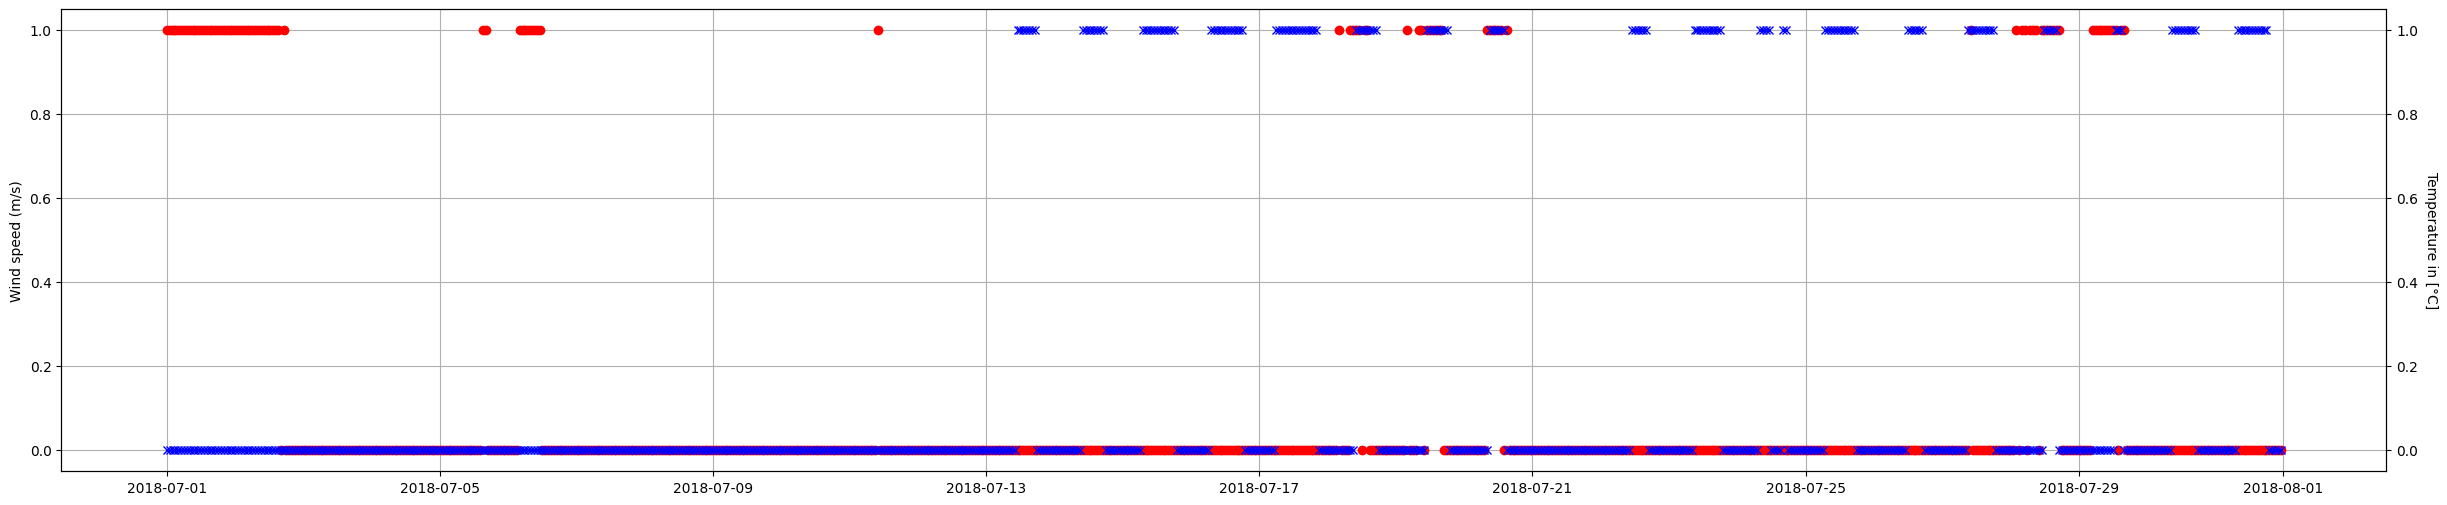

In [47]:
#ploting based on station location
# Node B C-FIG1 & D E-FIG2
fig, ax1 = plt.subplots(figsize=(30,6))
#left axis
ax1.set_ylabel("Wind speed (m/s)", color='black')
ax1.plot(WindSpeed_Airport['2018-7-1':'2018-7-31']>5,color='red', marker='o',linestyle='') 
#ax1.plot(WindSpeed_Airport['2018-7-1':'2018-7-31'],color='black', marker='.',linestyle='-') 
#right axis
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel("Temperature in [°C]", color='black',rotation=270,va="bottom")  
#ax2.plot(Temperature_Airport['2018-7-1':'2018-7-31'],color='grey', marker='.',linestyle='-')
ax2.plot(Temperature_Airport['2018-7-1':'2018-7-31']>25,color='blue', marker='x',linestyle='')
#
ax1.grid(True)  
#change x axis
#xfmt = mdates.DateFormatter('%H:%M')
#ax1.xaxis.set_major_formatter(xfmt)
#
plt.show()

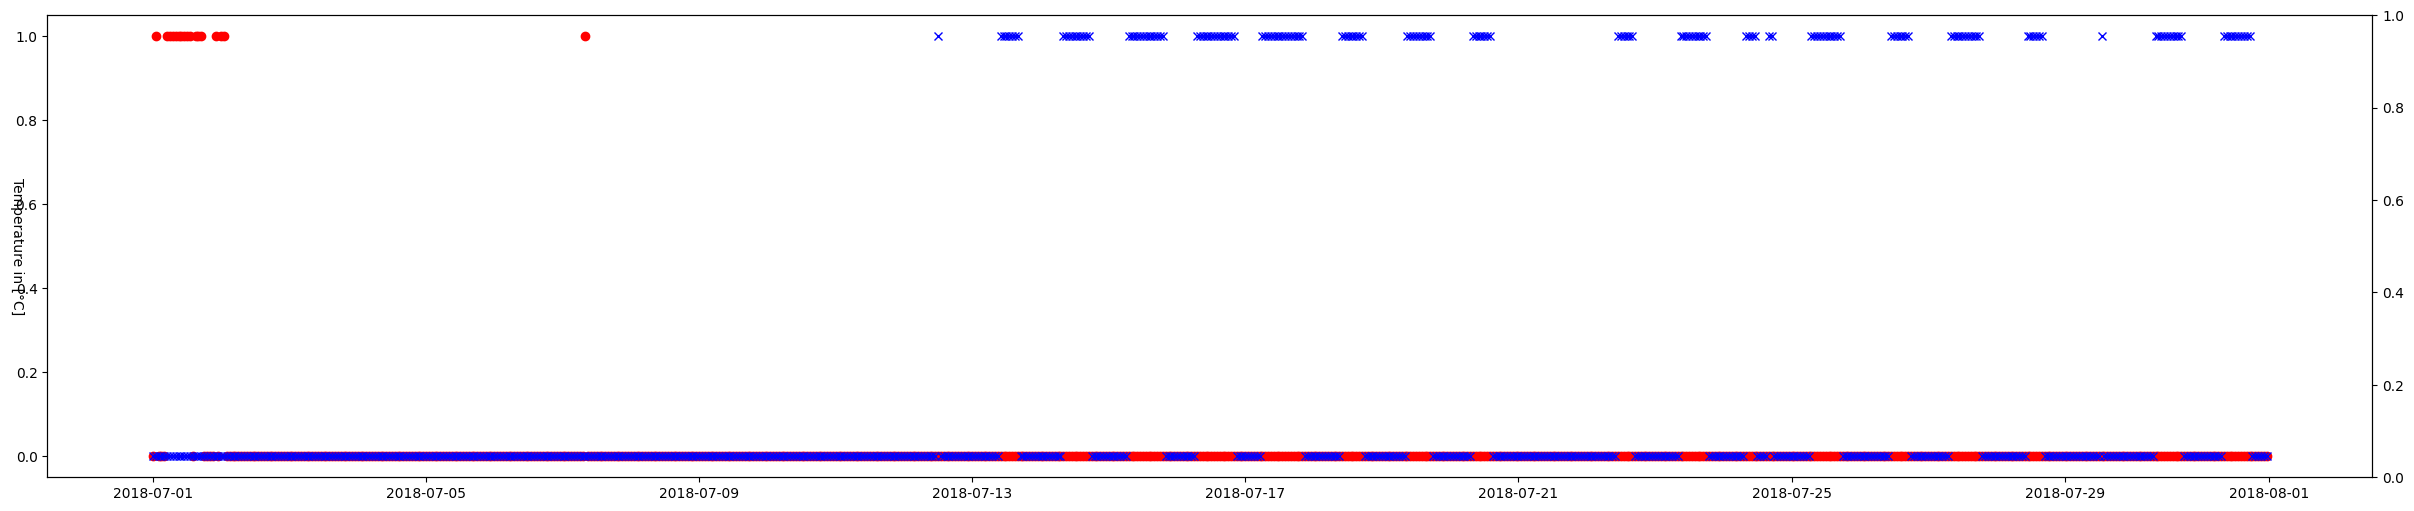

In [49]:
#ploting based on station location
# Node B C-FIG1 & D E-FIG2
fig, ax3 = plt.subplots(figsize=(30,6))
#left axis
ax3.set_ylabel("Wind speed (m/s)", color='black')
ax3.plot(WindSpeed_Lepola['2018-7-1':'2018-7-31']>5,color='red', marker='o',linestyle='') 
#ax1.plot(WindSpeed_Airport['2018-7-1':'2018-7-31'],color='black', marker='.',linestyle='-') 
#right axis
ax4 = ax3.twinx()  # instantiate a second axes that shares the same x-axis
ax3.set_ylabel("Temperature in [°C]", color='black',rotation=270,va="bottom")  
#ax2.plot(Temperature_Airport['2018-7-1':'2018-7-31'],color='grey', marker='.',linestyle='-')
ax3.plot(Temperature_Lepola['2018-7-1':'2018-7-31']>25,color='blue', marker='x',linestyle='')
#
ax1.grid(True)  
#change x axis
#xfmt = mdates.DateFormatter('%H:%M')
#ax1.xaxis.set_major_formatter(xfmt)
#
plt.show()

**(3) Node $A$ needs to identify risky situations in Lappeenranta when the temperature is above $25$ degrees and the wind is above $5$ m/s based on the sensors' signals. If a risky situation is identified at node $A$ as binary number "1" while normal situations as "0". How would you solve this problem? Plot the output signal from node $A$ and discuss its relation to the input signals from $B$-$E$.**

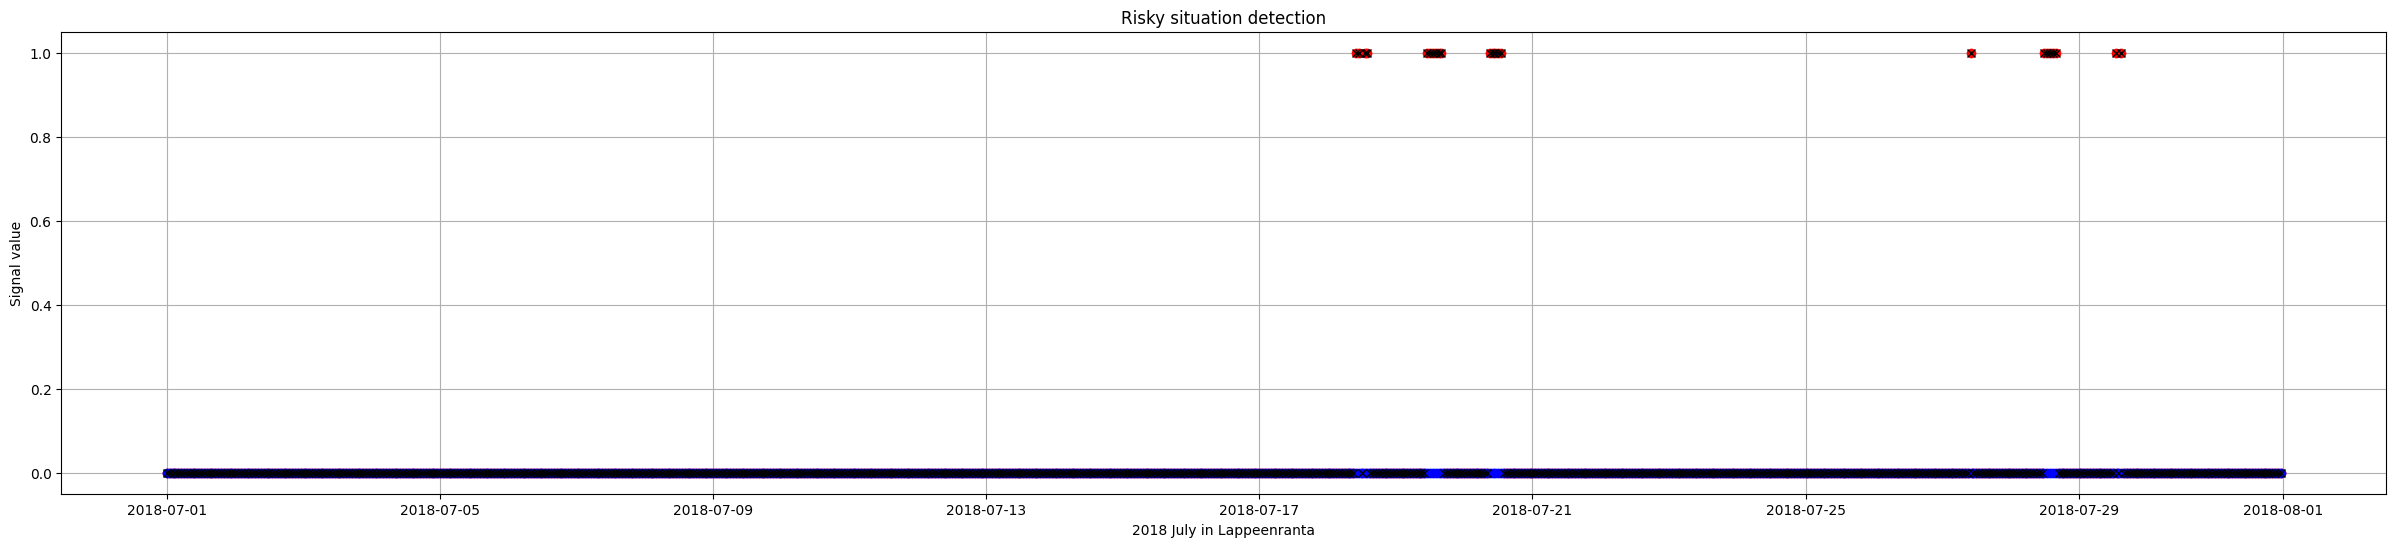

In [57]:
#ploting based on required logic
aux1=(Temperature_Airport['2018-7-1':'2018-7-31'].values>25) & (WindSpeed_Airport['2018-7-1':'2018-7-31'].values>5)
aux2=(Temperature_Lepola['2018-7-1':'2018-7-31'].values>25) & (WindSpeed_Lepola['2018-7-1':'2018-7-31'].values>5)
nodeA = aux1 | aux2
plt.figure(figsize=(30,6)) 
plt.plot(Temperature_Airport['2018-7-1':'2018-7-31'].index, aux1,color='red', marker='o',linestyle='') 
plt.plot(WindSpeed_Airport['2018-7-1':'2018-7-31'].index, aux2,color='blue', marker='o',linestyle='') 
plt.plot(WindSpeed_Airport['2018-7-1':'2018-7-31'].index,nodeA, color='black', marker='x',linestyle='')
plt.grid(True) 
plt.xlabel('2018 July in Lappeenranta')
plt.ylabel('Signal value')
plt.title('Risky situation detection')
plt.show() 

In [ ]:
#TAnswer:
#We need to combine the binary signals received by node A from nodes B-E. This can be done by implementing a logical AND operation between the signals received from nodes B and C, 
#and another logical AND operation between the signals received from nodes D and E. 
#Then, a logical OR operation can be performed between the results of the two AND operations. 
#The output of the OR operation represents the binary signal sent by node A.